# Importing Libraries

In [1]:
import os
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,classification_report,confusion_matrix

# Importing dataset and Models

In [2]:
import pickle
loaded_models = {}
X_test = pd.read_csv("Test_20\\Test_20\\X_Test_Data_Input.csv")
Y_test = pd.read_csv("Test_20\\Test_20\\Y_Test_Data_Target.csv")
X_test = X_test.drop(columns=['ID'])
Y_test = Y_test.drop(columns=['ID'])

randomForest_Model = joblib.load('Models\\random_forest_model.pkl')
xgb_model = joblib.load("Models\\xgb_model.pkl")
hist_Boost_Model = joblib.load("Models\\hist_Boost_Model.pkl")
lgb_model = joblib.load("Models\\lgb_model.pkl")
cb_model = joblib.load("Models\\cb_model.pkl")

models = [('Random Forest',randomForest_Model),
    ('XGBoost', xgb_model),
    ('hist Gradient Boost', hist_Boost_Model),
    ('LightGBM', lgb_model),
    ('CatBoost', cb_model)
]

In [3]:
models

[('Random Forest',
  RandomForestClassifier(class_weight='balanced', min_samples_split=5,
                         random_state=0)),
 ('XGBoost',
  XGBClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bynode=None,
                colsample_bytree=0.8, device=None, early_stopping_rounds=None,
                enable_categorical=False, eval_metric=None, feature_types=None,
                gamma=0, grow_policy=None, importance_type=None,
                interaction_constraints=None, learning_rate=0.1, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=7, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                multi_strategy=None, n_estimators=150, n_jobs=None,
                num_parallel_tree=None, random_state=0, ...)),
 ('hist Gradient Boost',
  HistGradientBoostingClassifier(max_depth=7, max_iter=200,

# Creating a fuction to evaluate all the models

### Evaluation Metrics:

For the evaluation of these models, I used the following metrics:
- **Accuracy**
- **Precision**
- **Recall**
- **F1 Score**
- **AUC-ROC (Area Under the Receiver Operating Characteristic Curve)**

In [4]:
model_metrics = []

# Function to evaluate a model and store the metrics
def evaluate_model(name, model, X_test=X_test, y_test=Y_test):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] 

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_prob)

    metrics = {
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'AUC-ROC': auc_roc
    }
    report = classification_report(y_test, y_pred)
    print(report)

    model_metrics.append(metrics)



### Iterating through all the models in the list and printing the metrics for each model

In [5]:

for name, model in models:
    evaluate_model(name, model)

for metric in model_metrics:
    print(metric)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99    237034
           1       0.81      0.97      0.88     24678

    accuracy                           0.98    261712
   macro avg       0.90      0.97      0.94    261712
weighted avg       0.98      0.98      0.98    261712

              precision    recall  f1-score   support

           0       0.99      0.98      0.99    237034
           1       0.85      0.94      0.89     24678

    accuracy                           0.98    261712
   macro avg       0.92      0.96      0.94    261712
weighted avg       0.98      0.98      0.98    261712

              precision    recall  f1-score   support

           0       0.99      0.98      0.99    237034
           1       0.85      0.94      0.89     24678

    accuracy                           0.98    261712
   macro avg       0.92      0.96      0.94    261712
weighted avg       0.98      0.98      0.98    261712

              preci

# Defining a funtion to visualize confusion matrix

In [6]:
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
                xticklabels=['Predicted Negative', 'Predicted Positive'], 
                yticklabels=['Actual Negative', 'Actual Positive'])
    plt.title(f'Confusion Matrix for {model_name}')
    plt.ylabel('Actual Class')
    plt.xlabel('Predicted Class')
    plt.show()

### Iterating through all the models and visualizing confusion matrix

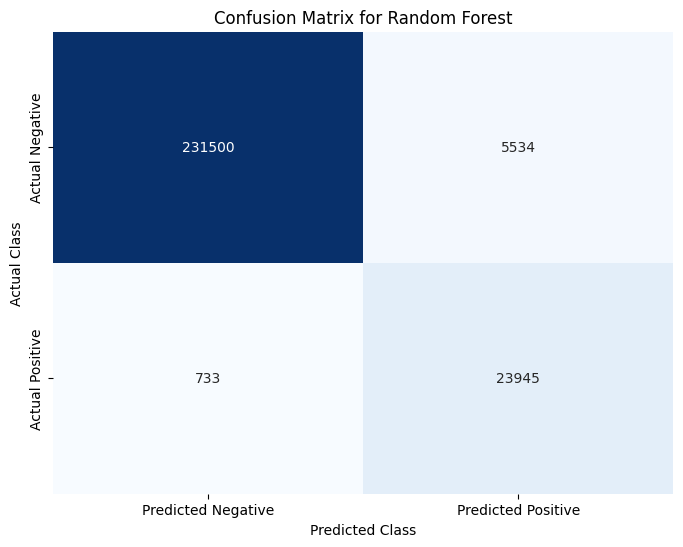

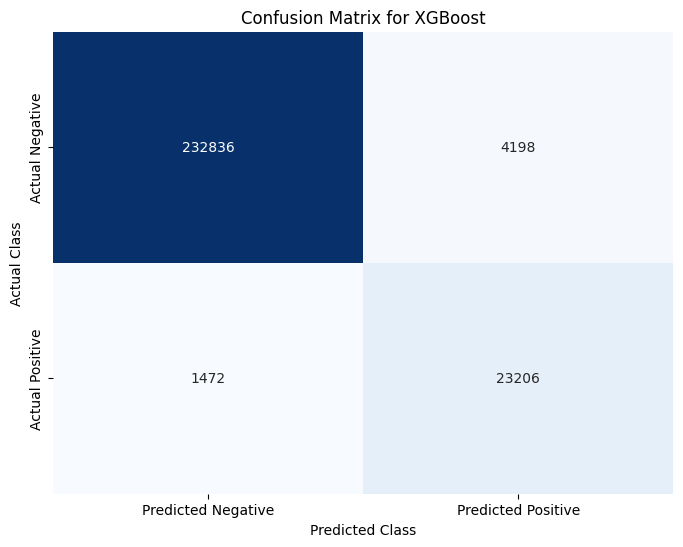

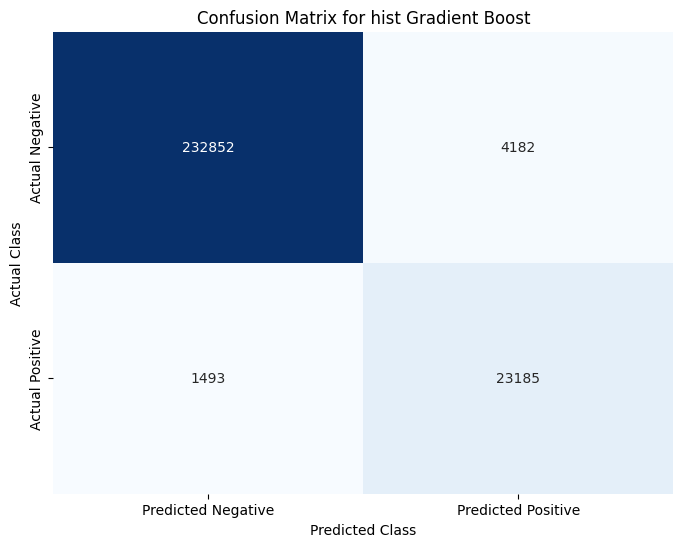

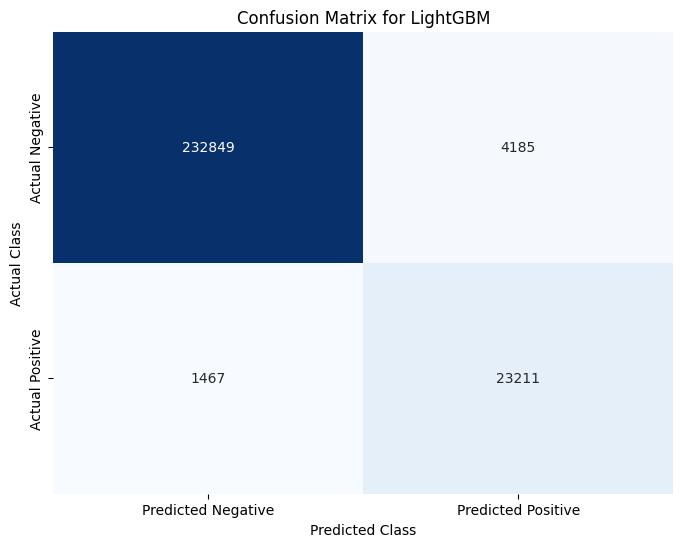

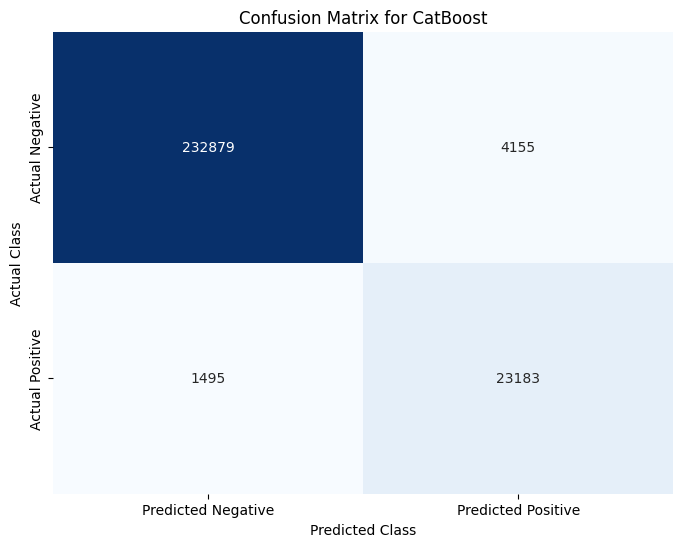

In [7]:
for name, model in models:
    y_pred = model.predict(X_test)
    plot_confusion_matrix(Y_test, y_pred, name)

### Visualizing model metrics

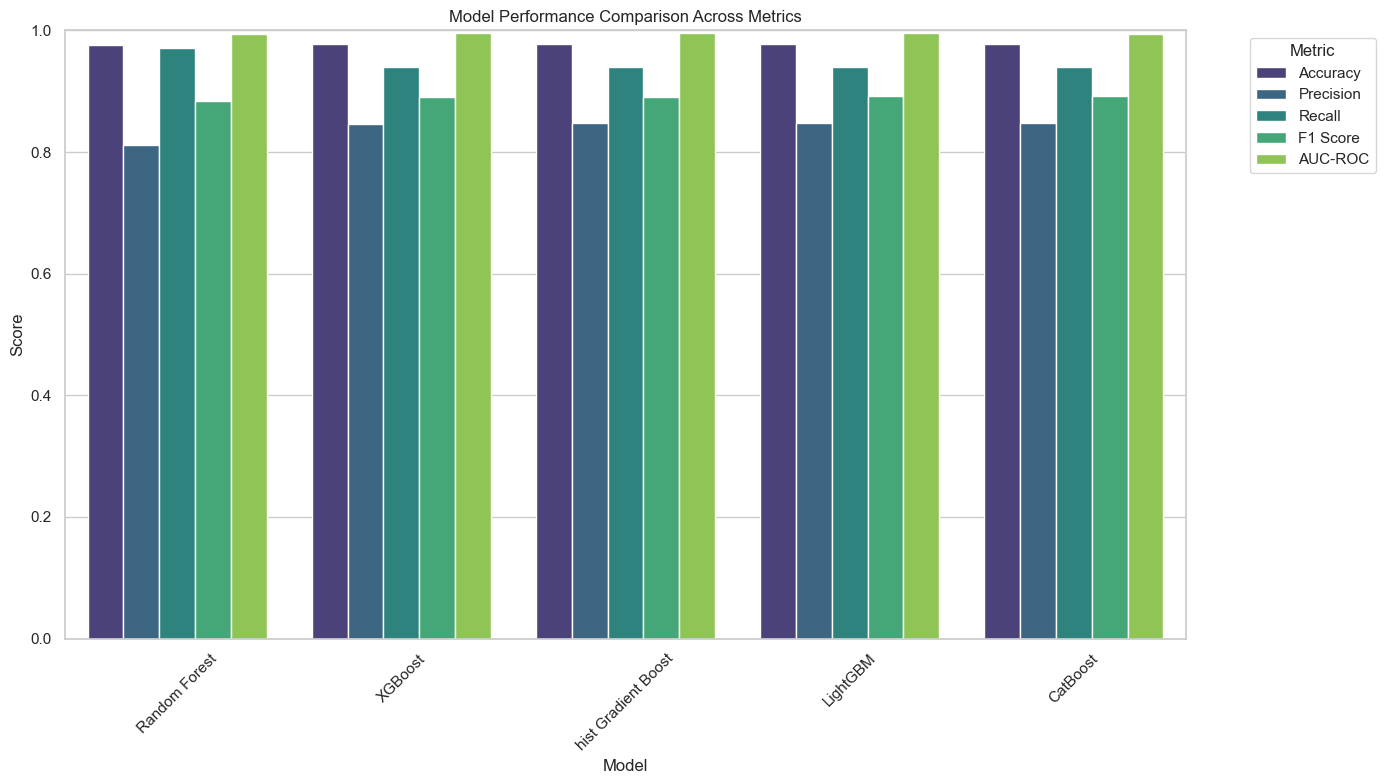

In [8]:
metrics_df = pd.DataFrame(model_metrics)

sns.set_theme(style="whitegrid")
metrics_melted = metrics_df.melt(id_vars=['Model'], var_name='Metric', value_name='Value')

# Plot all metrics together
plt.figure(figsize=(14, 8))
sns.barplot(x='Model', y='Value', hue='Metric', data=metrics_melted, palette="viridis")
plt.title('Model Performance Comparison Across Metrics')
plt.ylabel('Score')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.ylim(0, 1) 
plt.legend(title='Metric', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()